# TiTanic Data Visualization

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
data = pd.read_csv(r'C:\Users\IDEAPAD\Documents\GitHub\GoMyCode\checkpoint 3\resources\titanic-passengers-modif.csv')
data.head()#Entête du dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,Collander Mr. Erik Gustaf,male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,Moen Mr. Sigurd Hansen,male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,Jensen Mr. Hans Peder,male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,Palsson Mrs. Nils (Alma Cornelia Berglund),female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,Davidson Mr. Thornton,male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
data.describe()#Infos générales sur les colonnes et les valeurs

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.isnull().sum()#Recensement des valeurs nulles

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data = data.dropna(axis=0)#suppression des lignes NaN
data = data.drop(['Fare', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], axis=1)#suppression des lignes inutiles
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch
1,No,3,Moen Mr. Sigurd Hansen,male,25.0,0,0
4,No,1,Davidson Mr. Thornton,male,31.0,1,0
16,No,1,Widener Mr. Harry Elkins,male,27.0,0,2
19,Yes,1,Hoyt Mr. Frederick Maxfield,male,38.0,1,0
26,Yes,1,Frolicher-Stehli Mr. Maxmillian,male,60.0,1,1


In [6]:
# encoder = LabelEncoder()
# data['Survived'] = encoder.fit_transform(data['Survived'])
# data.drop(['No', 'Yes'], axis=1)
# data.head()

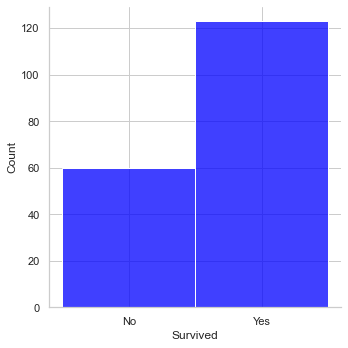

In [7]:
sns.set_theme(style = 'whitegrid')
sns.displot(data['Survived'], color="blue")#Nombre de personnes ayant survécu

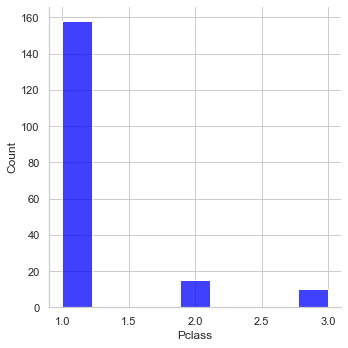

In [8]:
sns.displot(data['Pclass'], color="blue")#Nombre de personne par Class

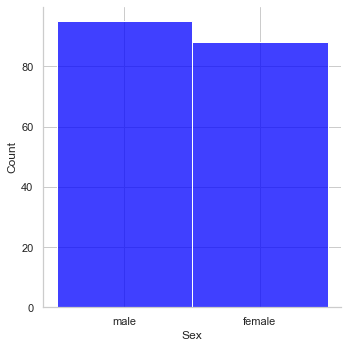

In [9]:
sns.displot(data['Sex'], color="blue")#Repartition des Sexes

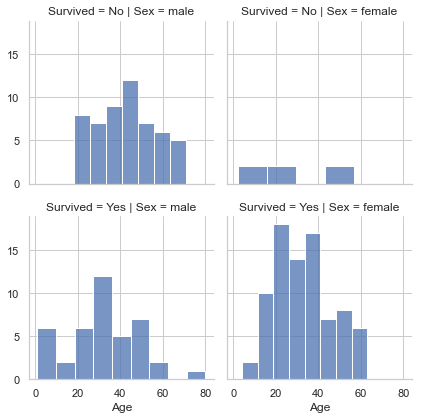

In [10]:
grid = sns.FacetGrid(data, row="Survived", col="Sex")
grid.map(sns.histplot, "Age")
grid.add_legend()

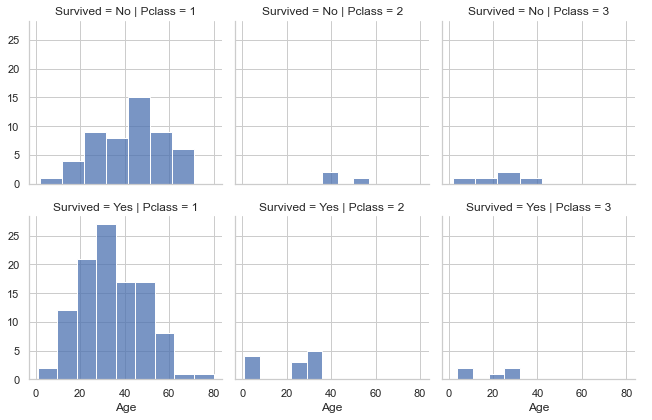

In [11]:
grid = sns.FacetGrid(data, row="Survived", col="Pclass")
grid.map(sns.histplot, "Age")
grid.add_legend()

In [12]:
#Def de la fonction

In [13]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 })

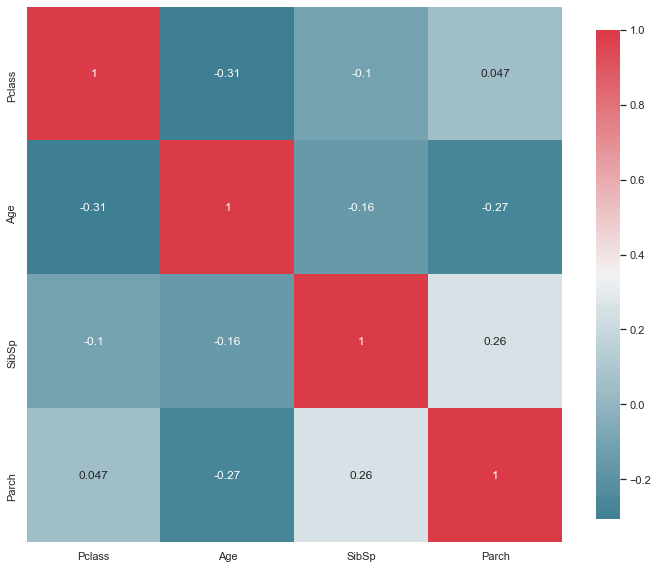

In [14]:
plot_correlation_map(data)

In [16]:
data.groupby(['Survived', 'Pclass']).mean()

Age     SibSp     Parch
Survived Pclass                               
No       1       42.971154  0.403846  0.442308
         2       43.166667  0.000000  0.666667
         3       23.400000  0.200000  0.400000
Yes      1       34.952075  0.528302  0.481132
         2       20.791667  0.500000  0.333333
         3       18.600000  0.200000  1.000000

In [17]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch
1,No,3,Moen Mr. Sigurd Hansen,male,25.0,0,0
4,No,1,Davidson Mr. Thornton,male,31.0,1,0
16,No,1,Widener Mr. Harry Elkins,male,27.0,0,2
19,Yes,1,Hoyt Mr. Frederick Maxfield,male,38.0,1,0
26,Yes,1,Frolicher-Stehli Mr. Maxmillian,male,60.0,1,1
